In [1]:
import gym
import numpy as np
import random
import torch
from torch import nn
from model import Policy

In [15]:
from matplotlib import pyplot as plt

In [41]:
env = gym.make('PongNoFrameskip-v4')
obs  = env.reset()

policy = Policy(n_actions=3)


In [42]:
temp = None
for i in range(4000):
    obs, r, done, _ = env.step(3)
    if done:
        print(i)
        break
    temp = np.array(obs)


3055


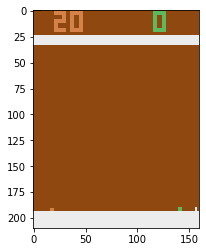

In [43]:
plt.imshow(temp)

In [47]:
player_loc, opponent_loc, ball_y, ball_x, v_y, v_x = policy.generate_features(obs, [156, 156])
player_loc, opponent_loc, ball_y, ball_x = policy.normalize_features(player_loc, opponent_loc, ball_y, ball_x)

In [48]:
d_obs = torch.Tensor([player_loc, opponent_loc, ball_y, ball_x, v_y, v_x]).view(1,-1)


In [49]:
print(d_obs)

tensor([[1.0219, 1.0156, 0.9750, 0.9750, 0.0000, 0.0000]])


In [8]:
print(player_loc, opponent_loc, ball_y, ball_x, v_y, v_x)


1.021875 0.803125 0.7625 0.23125 122 37


In [9]:
policy.generate_features(obs, [0,0])

[163.5, 128.5, 122, 37, 122, 37]

In [64]:
t = policy.layers(d_obs)

In [12]:
hold = policy.state_to_tensor(obs)

In [13]:
hold.shape

(160, 160)

In [61]:
temp = []
for i in range(1000):
    temp.append(np.random.choice(range(0, 3), p=[0.80, 0.1, 0.1]))

In [62]:
hold = 0
for i in temp:
    if i == 0:
        hold += 1

In [63]:
hold

799

In [66]:
t[0][2]

tensor(-0.0222, grad_fn=<SelectBackward>)